In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_df, city_data_df, how="outer", on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

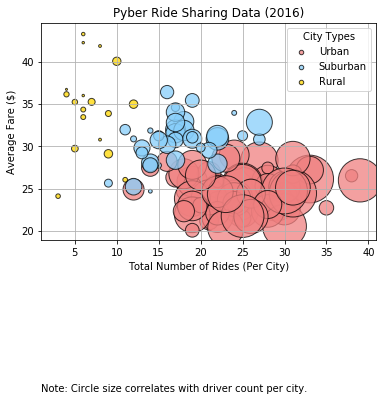

In [6]:
# Obtain the x and y coordinates for each of the three city types
x_limit1 = combined_data.loc[combined_data["type"] == "Urban"].groupby("city")["ride_id"].count()
bubbles1 = combined_data.loc[combined_data["type"] == "Urban"].groupby("city")["driver_count"].sum()


x_limit2 = combined_data.loc[combined_data["type"] == "Suburban"].groupby("city")["ride_id"].count()
bubbles2 = combined_data.loc[combined_data["type"] == "Suburban"].groupby("city")["driver_count"].sum()


x_limit3 = combined_data.loc[combined_data["type"] == "Rural"].groupby("city")["ride_id"].count()
bubbles3 = combined_data.loc[combined_data["type"] == "Rural"].groupby("city")["driver_count"].sum()



data1 = combined_data.loc[combined_data["type"] == "Urban"].groupby("city")["fare"].mean()
data2 = combined_data.loc[combined_data["type"] == "Suburban"].groupby("city")["fare"].mean()
data3 = combined_data.loc[combined_data["type"] == "Rural"].groupby("city")["fare"].mean()



# Build the scatter plots for each city types
plt.scatter(x_limit1, data1, marker="o", facecolors="lightcoral", label="Urban", edgecolor="black", 
            s=bubbles1, alpha=0.75)
plt.scatter(x_limit2, data2, marker="o", facecolors="lightskyblue", label="Suburban", edgecolor="black", 
            s=bubbles2, alpha=0.75)
plt.scatter(x_limit3, data3, marker="o", facecolors="gold", label="Rural", edgecolor="black", 
            s=bubbles3, alpha=0.75)
plt.grid()



# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")




# Create a legend
legnd = plt.legend(title="City Types", loc="upper right", scatterpoints=1, fontsize=10)
for handle in legnd.legendHandles:
    handle.set_sizes([20.0])


# Incorporate a text label regarding circle size
plt.text(1, 1, "Note: Circle size correlates with driver count per city.")




# Save Figure
plt.savefig("images/bubble_rides.png")

# Show plot
plt.show()

## Total Fares by City Type

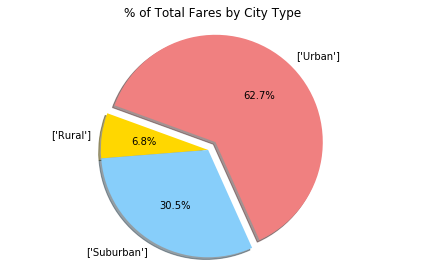

In [7]:
# Calculate Type Percents
city = combined_data.groupby("type")["type"].unique()

fare_list = combined_data.groupby("type")["fare"].sum()



# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fare_list, labels=city, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.tight_layout()


# Save Figure
plt.savefig("images/total_fares_by_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

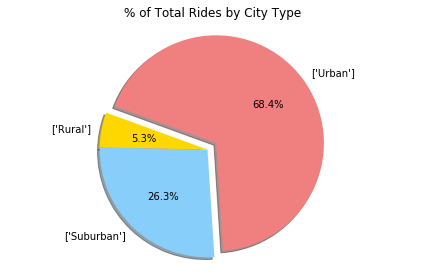

In [8]:
# Calculate Ride Percents
city = combined_data.groupby("type")["type"].unique()

ride_list = combined_data.groupby("type")["ride_id"].count()



# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(ride_list, labels=city, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.tight_layout()


# Save Figure
plt.savefig("images/total_rides_by_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

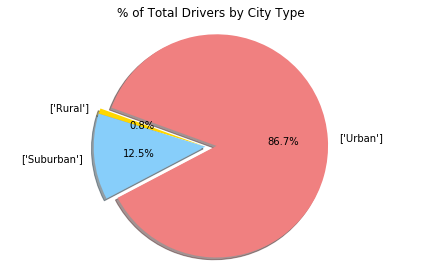

In [9]:
# Calculate Driver Percents
city = combined_data.groupby("type")["type"].unique()

drive_list = combined_data.groupby("type")["driver_count"].sum()


# Build Pie Charts
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drive_list, labels=city, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.tight_layout()


# Save Figure
plt.savefig("images/total_drivers_by_type.png")

# Show Figure
plt.show()

In [ ]:
# Written description of observable trends based on the data:

# From the data shown, it can be observed that urban has the most overwhelming percents of total fares, total 
# rides, and total drivers compared to the other city types. While rural has the lowest percents of total fares,
# total rides, and total drivers compared to the other city types. According to the bubble plot of ride sharing
# data, urban is the city type with the highest total number of rides per city with the lowest average fare while
# rural has the lowest total number of rides per city but with the highest average fare. The data among the bubble
# plot and pie charts appear to be consistent with urban as the city type with the highest portion of the data,
# suburban in the middle, and rural with the lowest portion.